# CNN Intro
* https://keras.io/applications/
* http://www.image-net.org/

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
from distutils.version import StrictVersion

In [5]:
import sklearn
print(sklearn.__version__)

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

0.18.1


In [6]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

assert StrictVersion(tf.__version__) >= StrictVersion('1.1.0')

1.3.0


In [7]:
import keras
print(keras.__version__)

assert StrictVersion(keras.__version__) >= StrictVersion('2.0.0')

Using TensorFlow backend.


2.0.5


In [8]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

## Modell-Architektur
http://cs231n.github.io/neural-networks-1/#power

### Layout of a typical CNN

![Layout of a typical CNN](https://github.com/DJCordhose/speed-limit-signs/raw/master/img/convnet-layoyt.jpeg)
http://cs231n.github.io/convolutional-networks/

### Classic VGG like Architecture
* we use a VGG like architecture
* based on https://arxiv.org/abs/1409.1556
* basic idea: sequential, deep, small convolutional filters, use dropouts to reduce overfitting
* 16/19 layers are typical
* we choose less layers, because we have limited resources

### Convolutional Blocks: Cascading many Convolutional Layers having down sampling in between

![Applying filters](http://cs231n.github.io/assets/cnn/cnn.jpeg)

http://cs231n.github.io/convolutional-networks/#conv

### Example of a Convolution
#### Original Image
![Dog](https://github.com/DJCordhose/speed-limit-signs/raw/master/img/conv/dog.png)
#### Many convolutional filters applied over all channels
![Dog after Convolutional Filters applied](https://github.com/DJCordhose/speed-limit-signs/raw/master/img/conv/dog-conv1.png)
http://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

### Downlsampling Layer: Reduces data sizes and risk of overfitting
![Pooling](http://cs231n.github.io/assets/cnn/pool.jpeg)
![Max Pooling](http://cs231n.github.io/assets/cnn/maxpool.jpeg)
http://cs231n.github.io/convolutional-networks/#pool

### Activation Functions

In [9]:
def centerAxis(uses_negative=False):
    # http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    if uses_negative:
        ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

### Sigmoid
* This is the classic
* Continuous version of step function

In [10]:
def np_sigmoid(X):
    return 1 / (1 + np.exp(X * -1))

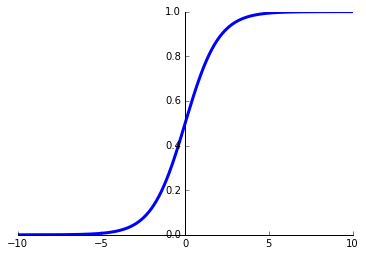

In [11]:
x = np.arange(-10,10,0.01)
y = np_sigmoid(x)

centerAxis()
plt.plot(x,y,lw=3)

### Relu
* perfect for blacking out everyhing beyong threshold
* this is just what everyone actually uses

In [12]:
def np_relu(x):
    return np.maximum(0, x)

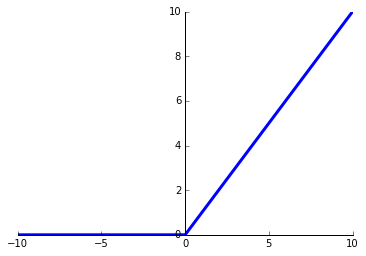

In [13]:
x = np.arange(-10, 10, 0.01)
y = np_relu(x)

centerAxis()
plt.plot(x,y,lw=3)

## The classic VGG16 Architecture
![NN Architecture](https://djcordhose.github.io/ai/img/flashcards/Architecture_Of_A_Neural_Network_print.png)

In [14]:
def predict(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    print('Predicted:', decode_predictions(preds, top=3)[0])

In [15]:
from keras import applications
# applications.VGG16?
vgg16_model = applications.VGG16(weights='imagenet')

## VGG starts with a number of convolutional blocks for feature extraction and ends with a fully connected classifier
![VGG architecture](https://djcordhose.github.io/ai/img/sketch/vgg.png)

In [16]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [17]:
!curl -O https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Beagle_Upsy.jpg/440px-Beagle_Upsy.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (56) Received HTTP code 403 from proxy after CONNECT


![Beagle](https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Beagle_Upsy.jpg/440px-Beagle_Upsy.jpg)

In [18]:
predict(model = vgg16_model, img_path = '440px-Beagle_Upsy.jpg')

Predicted: [('n02088364', 'beagle', 0.32020867), ('n02089973', 'English_foxhound', 0.26515135), ('n02089867', 'Walker_hound', 0.20564148)]


In [19]:
!curl -O https://djcordhose.github.io/ai/img/cat-bonkers.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  843k  100  843k    0     0  1917k      0 --:--:-- --:--:-- --:--:-- 1916k


In [20]:
predict(model = vgg16_model, img_path = 'cat-bonkers.png')

Predicted: [('n02124075', 'Egyptian_cat', 0.93594509), ('n02123045', 'tabby', 0.040695436), ('n02123159', 'tiger_cat', 0.019523595)]


In [21]:
!curl -O https://djcordhose.github.io/ai/img/squirrels/original/Michigan-MSU-raschka.jpg
!curl -O https://djcordhose.github.io/ai/img/squirrels/original/Black_New_York_stuy_town_squirrel_amanda_ernlund.jpeg
!curl -O https://djcordhose.github.io/ai/img/squirrels/original/london.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  126k  100  126k    0     0   659k      0 --:--:-- --:--:-- --:--:--  664k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  302k  100  302k    0     0  1314k      0 --:--:-- --:--:-- --:--:-- 1314k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  494k  100  494k    0     0  1143k      0 --:--:-- --:--:-- --:--:-- 1152k


![Squirrel 1: Michigan MSU](https://djcordhose.github.io/ai/img/squirrels/original/Michigan-MSU-raschka.jpg)
![Squirrel 2: Stuy Town](https://djcordhose.github.io/ai/img/squirrels/original/Black_New_York_stuy_town_squirrel_amanda_ernlund.jpeg)
![Squirrel 3: London](https://djcordhose.github.io/ai/img/squirrels/original/london.jpg)

In [22]:
predict(model = vgg16_model, img_path = 'Michigan-MSU-raschka.jpg')

Predicted: [('n02356798', 'fox_squirrel', 0.99995279), ('n02361337', 'marmot', 4.3569533e-05), ('n02120505', 'grey_fox', 2.3456425e-06)]


In [23]:
predict(model = vgg16_model, img_path = 'Black_New_York_stuy_town_squirrel_amanda_ernlund.jpeg')

Predicted: [('n01514859', 'hen', 0.251127), ('n01514668', 'cock', 0.13989805), ('n02486410', 'baboon', 0.13570367)]


In [24]:
predict(model = vgg16_model, img_path = 'london.jpg')

Predicted: [('n02655020', 'puffer', 0.21103905), ('n02441942', 'weasel', 0.085964032), ('n01950731', 'sea_slug', 0.06110343)]


## What does the CNN "see"?
### Does it "see" the right thing?
* Each filter output of a convolutional layer is called *feature channel*
* with each input they should ideally either be
  * blank if they do not recognize any feature in the input or
  * encode what the feature channel "sees" in the input
* feature channels directly before FC layers are often called *bottleneck feature channels*

### Some activations from bottleneck features:
![Beagle Activation](https://github.com/DJCordhose/ai/raw/master/docs/img/conv/where-is-the-beagle.png)
![Squirrel Activation](https://github.com/DJCordhose/ai/raw/master/docs/img/conv/where-is-the-squirrel.png)
![Cat Activation](https://github.com/DJCordhose/ai/raw/master/docs/img/conv/where-is-bonkers.png)

In [25]:
# create a tmp dir in the local directory this notebook runs in, otherwise quiver will fail (and won't tell you why)
!rm -rf tmp
!mkdir tmp

## Visualizing feature channels using Quiver
### Only works locally

In [26]:
# https://github.com/keplr-io/quiver

# Alternative with more styles of visualization: https://github.com/raghakot/keras-vis

# https://github.com/keplr-io/quiver
# from quiver_engine import server
# server.launch(vgg16_model, input_folder='.', port=7000)

# open at http://localhost:7000/
# interrupt kernel to return control to notebook

ImportError: No module named 'quiver_engine'

## Modern Alternative: Resnet
* https://keras.io/applications/#resnet50
* https://arxiv.org/abs/1512.03385
* New Layer Type: https://keras.io/layers/normalization/

In [ ]:
from keras.applications.resnet50 import ResNet50

resnet_model = ResNet50(weights='imagenet')

In [ ]:
resnet_model.summary()

In [ ]:
predict(model = resnet_model, img_path = 'cat-bonkers.png')

In [ ]:
predict(model = resnet_model, img_path = 'Michigan-MSU-raschka.jpg')

In [ ]:
predict(model = resnet_model, img_path = 'Black_New_York_stuy_town_squirrel_amanda_ernlund.jpeg')

In [ ]:
predict(model = resnet_model, img_path = 'london.jpg')

---

# Hands-On 1 (CNN Overview)
## Experiment with all Kinds of Layers: https://transcranial.github.io/keras-js/#/mnist-cnn
![Keras Browser](https://djcordhose.github.io/ai/img/browser/keras-browser.png)
* Try to fool the network by incrementally drawing ambiguous digits

__Side Node__: Keras.js makes all Keras Models available in the Browser

---

---

# Hands-On 2 (Filter Kernel Details)
## Try out Filter Kernels: http://setosa.io/ev/image-kernels/
![Image Kernels](https://djcordhose.github.io/ai/img/browser/setosa_io_image-kernels.png)
* Try out Filter Kernels Sharpen and Blur on a speed limit sign: https://github.com/DJCordhose/speed-limit-signs/raw/master/data/real-world/4/100-sky-cutoff-detail.jpg
* Create a custom filter

![100 Speed Limit Sign](https://github.com/DJCordhose/speed-limit-signs/raw/master/data/real-world/4/100-sky-cutoff-detail.jpg)

---